In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv('Regression_Insurance_Data.csv')


In [3]:
pd.set_option('display.max_rows', None)

In [4]:
#top five data
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 8)

In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [7]:
# check row and columns
df.shape

(1338, 8)

In [8]:
#data 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [9]:
#here we can see minimum age and maximum age ,age can not be -ve and also 190

In [10]:
#chack -ve age
df[(df['age']<0) | ( df['age']>100)]

,age,sex,bmi,classif,children,smoker,region,charges
116,-58,male,49.060,OB3,0,no,southeast,11381.32540
565,190,female,30.495,OB1,0,no,northwest,2128.43105
1337,-1,female,29.070,PREO,0,yes,northwest,29141.36030


In [11]:
# here we can see that two -ve age first -58 and second is -1 
# age 190 its not possible
# change the age by mean

In [12]:
df.age.replace(-58,39,inplace=True)
df.age.replace(-1,39,inplace=True)
df.age.replace(190,39,inplace=True)

In [13]:
#chack data again
df[(df['age']<0) | ( df['age']>100)]

,age,sex,bmi,classif,children,smoker,region,charges


In [14]:
#describe the data(descriptive statistical measures )
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.123318,30.663397,1.094918,13270.422265
std,14.088157,6.098187,1.205493,12110.011237
min,0.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# replce null value by OB1
df.classif.fillna(df.classif.mode()[0], inplace=True)

In [16]:
#check missing value again
df.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
# create new columns weight_status
df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                       np.where(df['bmi'] < 30.000, 'overweight','obese')))
df.drop('classif',inplace=True,axis=1)

In [18]:
df['Age Group'] = pd.cut(
    df['age'], 
    [-1, 20,30,40,50, 60, 70], 
    labels=['0-20', '21-30', '31-40','41-50','51-60','61-70']
)
df.drop(df.columns[8], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status,Age Group
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,0-20
1,18,male,33.770,1,no,southeast,1725.55230,obese,0-20
2,28,male,33.000,3,no,southeast,4449.46200,obese,21-30
3,0,male,22.705,0,no,northwest,21984.47061,normal,0-20
4,32,male,28.880,0,no,northwest,3866.85520,overweight,31-40


In [19]:
df=df.drop_duplicates()

In [20]:
# onely one duplicate value exist now which is removed
df.shape

(1337, 9)

In [21]:
#check missing value
df.isnull().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
weight_status    0
Age Group        0
dtype: int64

In [22]:
#no missing value

In [23]:
df.weight_status.value_counts()

obese          706
overweight     386
normal         230
underweigth     15
Name: weight_status, dtype: int64

### EDA-EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='sex', ylabel='count'>

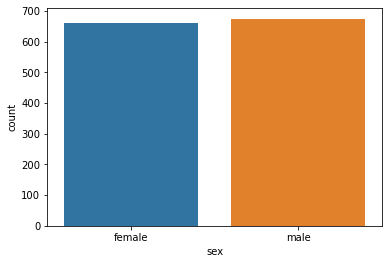

In [24]:
sns.countplot(x = 'sex', data = df)

In [25]:
#The graph shows that the number of male and female is almost equal.

<AxesSubplot:xlabel='children', ylabel='count'>

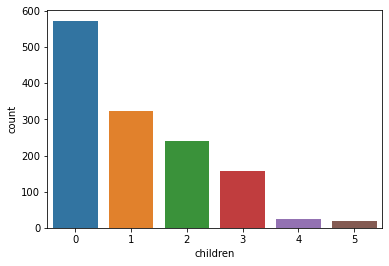

In [26]:
sns.countplot(x = 'children', data = df)

In [27]:
#we can see in graph, there are more number of people with no children. 
#Then there are people having 1-3 children and there are very less people having 4-5 children.

<AxesSubplot:xlabel='smoker', ylabel='count'>

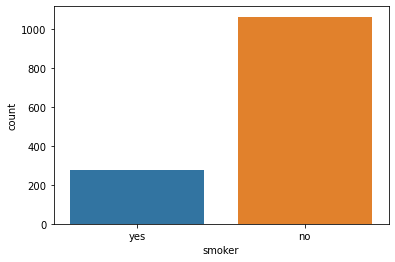

In [28]:
# plot of smoker variable

sns.countplot(x = 'smoker', data = df)

In [29]:
# there are more non-smokers than smokers.

<AxesSubplot:xlabel='Age Group', ylabel='count'>

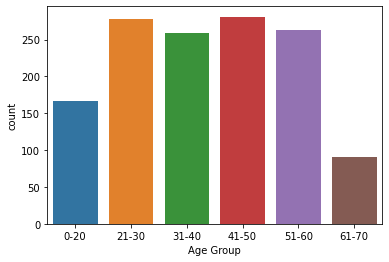

In [30]:
# plot of Age Group variable

sns.countplot(x = 'Age Group', data = df)

In [31]:
#41-50 age group has maximum no. of people

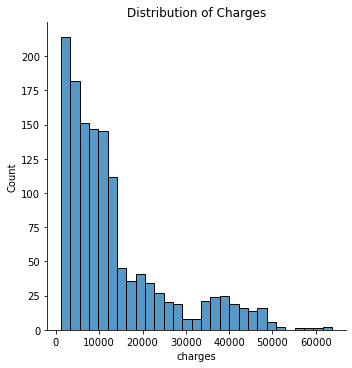

In [32]:
# distribution of charges variable

sns.displot(df['charges'])
plt.title('Distribution of Charges')
plt.show()

In [33]:
#the charges are most around 1000-20,000 dollars.

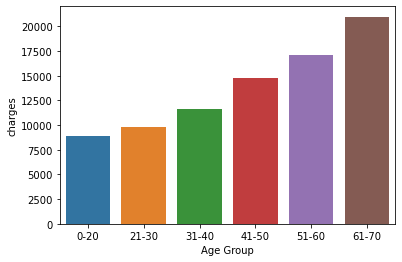

In [34]:
sns.barplot(x='Age Group',y='charges',data=df,ci=None)
plt.show()

In [35]:
#Older people have more expensive charges


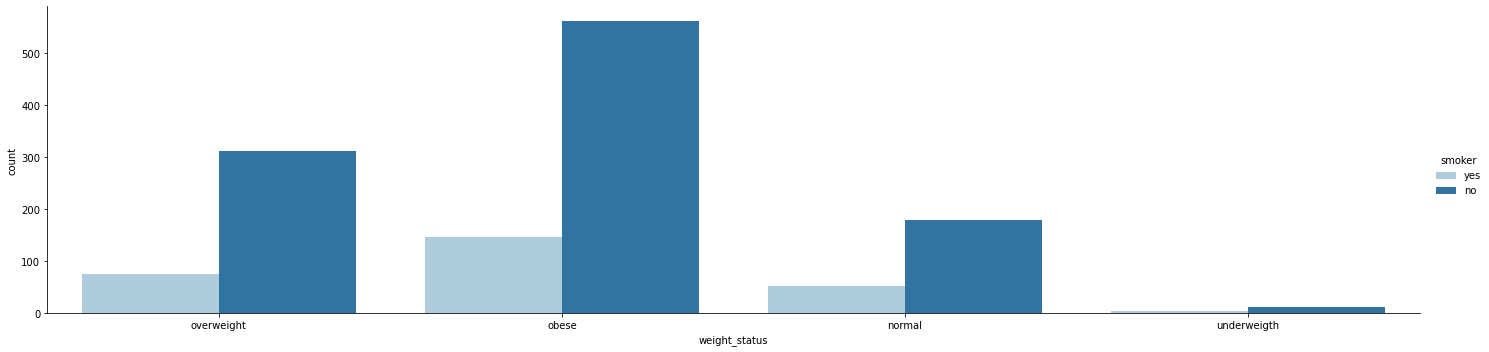

In [36]:
#Barplot Charges per Region

sns.catplot(data=df, x='weight_status',hue='smoker', kind= 'count', aspect=4, palette='Paired')

In [37]:
#Most people are a non smokers & obese

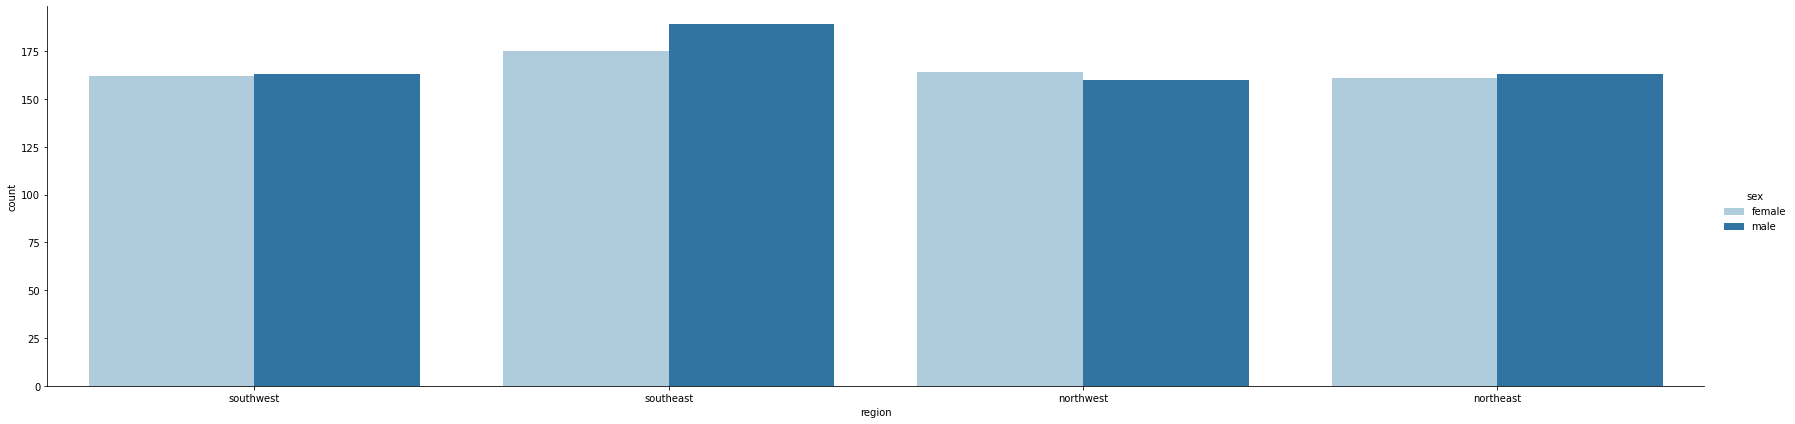

In [38]:
sns.catplot(data=df, x='region',hue='sex', kind= 'count',size=6, aspect=4, palette='Paired')

In [39]:
# this graph show that region wise sex,southwest male has high no. of people 

<AxesSubplot:xlabel='children', ylabel='charges'>

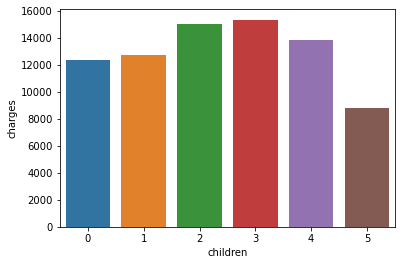

In [40]:
#Barplot Charges per Region
sns.barplot(x = 'children', y ='charges',data=df,ci=None)

In [41]:
#Figure shows the impact of the number of children on charges.

In [42]:
region_charges = df.groupby(['region']).sum().reset_index()


<AxesSubplot:xlabel='region', ylabel='charges'>

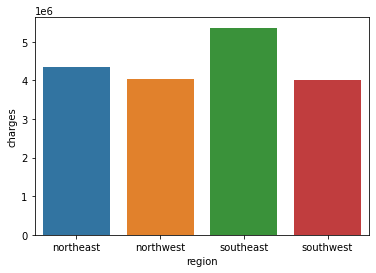

In [43]:
#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges',data=region_charges)

In [44]:
#southeast people has high charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

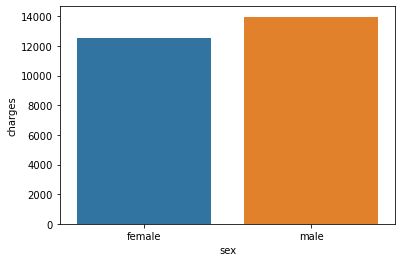

In [45]:
 
sns.barplot(x = 'sex', y ='charges',data=df,ci=None)

<AxesSubplot:xlabel='weight_status', ylabel='charges'>

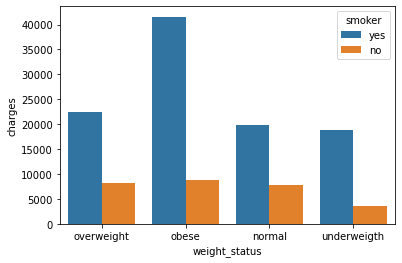

In [46]:
#Barplot Smoker_Status_Charges
sns.barplot(x = 'weight_status', y = 'charges', hue = 'smoker', data = df,ci=None)

<AxesSubplot:xlabel='region', ylabel='charges'>

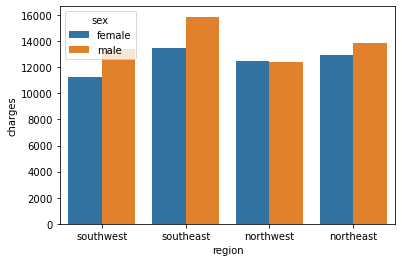

In [47]:
#Barplot Smoker_Status_Charges
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df,ci=None)

#### Conclusion from graph

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status,Age Group
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,0-20
1,18,male,33.770,1,no,southeast,1725.55230,obese,0-20
2,28,male,33.000,3,no,southeast,4449.46200,obese,21-30
3,0,male,22.705,0,no,northwest,21984.47061,normal,0-20
4,32,male,28.880,0,no,northwest,3866.85520,overweight,31-40


In [49]:
df.dtypes

age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges           float64
weight_status      object
Age Group        category
dtype: object

### Use Label Encoder technique to convert categorical column into numerical type

In [50]:
df1=df.copy()
df1.drop(df1.columns[[8]],axis=1,inplace=True)
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df1['sex']=label_encoder.fit_transform(df1['sex'])
df1['smoker']=label_encoder.fit_transform(df1['smoker'])
df1['region']=label_encoder.fit_transform(df1['region'])
df1['weight_status']=label_encoder.fit_transform(df1['weight_status'])


In [51]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,0,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,2


#### Data scaling

In [52]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=pd.DataFrame(scaler.fit_transform(df1),columns = df1.columns)


In [53]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,weight_status
0,-1.430547,-1.009771,-0.453160,-0.909234,1.969660,1.343163,0.297857,1.234558
1,-1.501582,0.990324,0.509422,-0.079442,-0.507702,0.438017,-0.954381,-0.199503
2,-0.791224,0.990324,0.383155,1.580143,-0.507702,0.438017,-0.729373,-0.199503
3,-2.780228,0.990324,-1.305052,-0.909234,-0.507702,-0.467128,0.719104,-1.633564
4,-0.507080,0.990324,-0.292456,-0.909234,-0.507702,-0.467128,-0.777499,1.234558


In [54]:
x=df2.drop('charges',inplace=True,axis=1)



In [55]:
x=df2
y=df1.charges

### Spliting data

In [56]:
# split the data 70:30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(935, 7) (935,) (402, 7) (402,)


### Build a model to predict the insurance policy amount

## Linear regression for all feature

In [57]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)

In [58]:
#evaluation
score0=lr.score(x_train,y_train)
score0=round(score0*100,2)
score0

73.25

In [59]:
score1=r2_score(y_test,pred1)
score1=round(score1*100,2)
score1

77.29

In [60]:
#mse,mae and rmse value
MSE1=round(mean_squared_error(y_test,pred1),2)
RMSE1=round(mean_squared_error(y_test,pred1,squared=False),2)
MAE1=round(mean_absolute_error(y_test,pred1),2)
MSE1,RMSE1,MAE1

(38853657.36, 6233.27, 4142.57)

In [61]:
df3=pd.DataFrame({'Actual':y_test,'Predict':pred1,'Variance':y_test-pred1})
df3.head()

,Actual,Predict,Variance
900,8688.85885,8624.466967,64.391883
1064,5708.86700,4853.445893,855.421107
1256,11436.73815,14384.225423,-2947.487273
298,38746.35510,31596.525859,7149.829241
237,4463.20510,9293.931725,-4830.726625


In [62]:
## Linear regression for  bmi,age,smoker

In [63]:
df2.head()

,age,sex,bmi,children,smoker,region,weight_status
0,-1.430547,-1.009771,-0.453160,-0.909234,1.969660,1.343163,1.234558
1,-1.501582,0.990324,0.509422,-0.079442,-0.507702,0.438017,-0.199503
2,-0.791224,0.990324,0.383155,1.580143,-0.507702,0.438017,-0.199503
3,-2.780228,0.990324,-1.305052,-0.909234,-0.507702,-0.467128,-1.633564
4,-0.507080,0.990324,-0.292456,-0.909234,-0.507702,-0.467128,1.234558


In [64]:
x1=df2[['age','bmi','smoker']]
y=df1.charges

In [65]:
# split the data 70:30
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y,test_size=0.3,random_state=42)
print(x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape)

(935, 3) (935,) (402, 3) (402,)


In [66]:
lr1=LinearRegression()
lr1.fit(x_train1,y_train1)
pred2=lr1.predict(x_test1)

In [67]:
#evaluation
score2=lr1.score(x_train1,y_train1)
score2=round(score2*100,2)
score2

72.79

In [68]:
score3=r2_score(y_test1,pred2)
score3=round(score3*100,2)
score3

77.05

In [69]:
#mse,mae and rmse value
MSE2=round(mean_squared_error(y_test1,pred2),2)
RMSE2=round(mean_squared_error(y_test1,pred2,squared=False),2)
MAE2=round(mean_absolute_error(y_test1,pred2),2)
MSE2,RMSE2,MAE2

(39264822.3, 6266.16, 4207.54)

In [70]:
df4=pd.DataFrame({'Actual':y_test1,'Predict':pred2,'Variance':y_test1-pred2})
df4.head()

,Actual,Predict,Variance
900,8688.85885,8266.876475,421.982375
1064,5708.86700,4264.251647,1444.615353
1256,11436.73815,13090.664723,-1653.926573
298,38746.35510,30365.947924,8380.407176
237,4463.20510,8751.092558,-4287.887458


#### Decision Tree Regressor

In [71]:
#Decision Tree Regressor
#Tuning the Depth of a Tree

In [72]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=4, shuffle=False, random_state=None)
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 1), x, y, cv= kf,scoring="r2") 
    print(f'For max depth: {val}')
    #rmse(score.mean())
    print('r2 score :',score.mean())

For max depth: 1
r2 score : 0.6161048598864115
For max depth: 2
r2 score : 0.8189436194122341
For max depth: 3
r2 score : 0.8399587499469677
For max depth: 4
r2 score : 0.8359494442149998
For max depth: 5
r2 score : 0.825843557712216
For max depth: 6
r2 score : 0.8158785974381573
For max depth: 7
r2 score : 0.7925508985874794
For max depth: 8
r2 score : 0.7719308959257085
For max depth: 9
r2 score : 0.739341622971194
For max depth: 10
r2 score : 0.7142170353793991
For max depth: 11
r2 score : 0.6897196264887967
For max depth: 12
r2 score : 0.6880440462420527
For max depth: 13
r2 score : 0.6869882909164922
For max depth: 14
r2 score : 0.6804687224192343
For max depth: 15
r2 score : 0.6829009522693292


In [73]:
dtm1 = DecisionTreeRegressor(max_depth=4)
dtm1.fit(x_train, y_train)
pred4 = dtm1.predict(x_test)


In [74]:
score6=dtm1.score(x_train,y_train)
score6=round(score6*100,2)
score6

86.07

In [75]:
score7=r2_score(y_test,pred4)
score7=round(score7*100,2)
score7

86.68

In [76]:
#mse,mae and rmse value
MSE3=round(mean_squared_error(y_test,pred4),2)
RMSE3=round(mean_squared_error(y_test,pred4,squared=False),2)
MAE3=round(mean_absolute_error(y_test,pred4),2)
MSE3,RMSE3,MAE3

(22792593.48, 4774.16, 2775.8)

In [77]:
df5=pd.DataFrame({'Actual':y_test,'Predict':pred4,'Variance':y_test-pred4})
df5.head()

,Actual,Predict,Variance
900,8688.85885,11212.851141,-2523.992291
1064,5708.86700,6655.721858,-946.854858
1256,11436.73815,11212.851141,223.887009
298,38746.35510,41574.337559,-2827.982459
237,4463.20510,6655.721858,-2192.516758


### Random Forest Regressor

In [78]:
rf = RandomForestRegressor(oob_score=True) 
rf.fit(x_train, y_train)
pred5 = rf.predict(x_test)

In [79]:
rf.oob_score_

0.8250306521528007

In [80]:
rf.score(x_train,y_train)

0.9759605990999681

In [81]:
score71=rf.score(x_train,y_train)
score71=round(score71*100,2)
score71

97.6

In [82]:
score8=r2_score(y_test,pred5)
score8=round(score8*100,2)
score8

86.1

In [83]:
MSE4=round(mean_squared_error(y_test,pred5),2)
RMSE4=round(mean_squared_error(y_test,pred5,squared=False),2)
MAE4=round(mean_absolute_error(y_test,pred5),2)
MSE4,RMSE4,MAE4

(23776972.24, 4876.16, 2631.01)

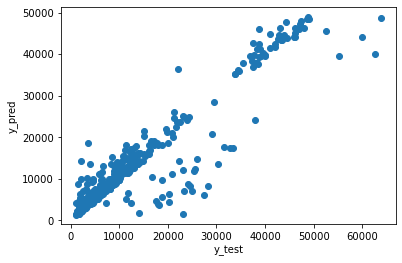

In [84]:
plt.scatter(y_test,pred5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [85]:
def plotGraph(y_test,pred5):
    if max(y_test) >= max(pred5):
        my_range = int(max(y_test))
    else:
        my_range = int(max(pred5))
    plt.scatter(y_test, pred5, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title('RandomForest')
    plt.show()
    return


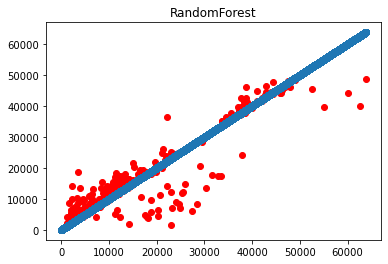

In [86]:
plotGraph(y_test,pred5)

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

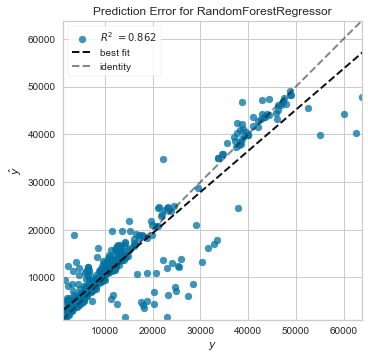

In [87]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
rf = RandomForestRegressor(oob_score=True) 
visualizer = PredictionError(rf) 
# fit visualizer on training data
visualizer.fit(x_train, y_train) 
#Evaluate on test data
visualizer.score(x_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

In [88]:
df6=pd.DataFrame({'Actual':y_test,'Predict':pred5,'Variance':y_test-pred5})
df6.head()

,Actual,Predict,Variance
900,8688.85885,9559.870761,-871.011911
1064,5708.86700,7410.011707,-1701.144707
1256,11436.73815,12959.535710,-1522.797560
298,38746.35510,42523.583187,-3777.228087
237,4463.20510,5730.093319,-1266.888219


In [89]:
params = {
"max_depth" : [5,6,7.8,9,10,11,12,13,14,15],
"n_estimators" : [6,12]
}

In [90]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator=rf,param_grid=params,cv=5,scoring="accuracy")
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'max_depth': [5, 6, 7.8, 9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [6, 12]},
             scoring='accuracy')

In [91]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'max_depth': [5, 6, 7.8, 9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [6, 12]},
             scoring='accuracy')

In [92]:
grid_search.best_score_

nan

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=6, oob_score=True)

In [94]:
rf_best = RandomForestRegressor(max_depth=5, n_estimators=6, oob_score=True)

In [95]:
rf_best.fit(x_train, y_train)
pred6 = rf_best.predict(x_test)

In [96]:
score81=rf_best.score(x_train,y_train)
score81=round(score81*100,2)
score81

88.7

In [97]:
score9=r2_score(y_test,pred6)
score9=round(score9*100,2)
score9

87.04

In [98]:
MSE5=round(mean_squared_error(y_test,pred6),2)
RMSE5=round(mean_squared_error(y_test,pred6,squared=False),2)
MAE5=round(mean_absolute_error(y_test,pred6),2)
MSE5,RMSE5,MAE5

(22171014.02, 4708.61, 2705.18)

In [99]:
dff=pd.DataFrame({'Actual' : y_test,'LR': pred1,'DT(H)':pred4,'RF':pred5})

In [100]:
dff.head()

,Actual,LR,DT(H),RF
900,8688.85885,8624.466967,11212.851141,9559.870761
1064,5708.86700,4853.445893,6655.721858,7410.011707
1256,11436.73815,14384.225423,11212.851141,12959.535710
298,38746.35510,31596.525859,41574.337559,42523.583187
237,4463.20510,9293.931725,6655.721858,5730.093319


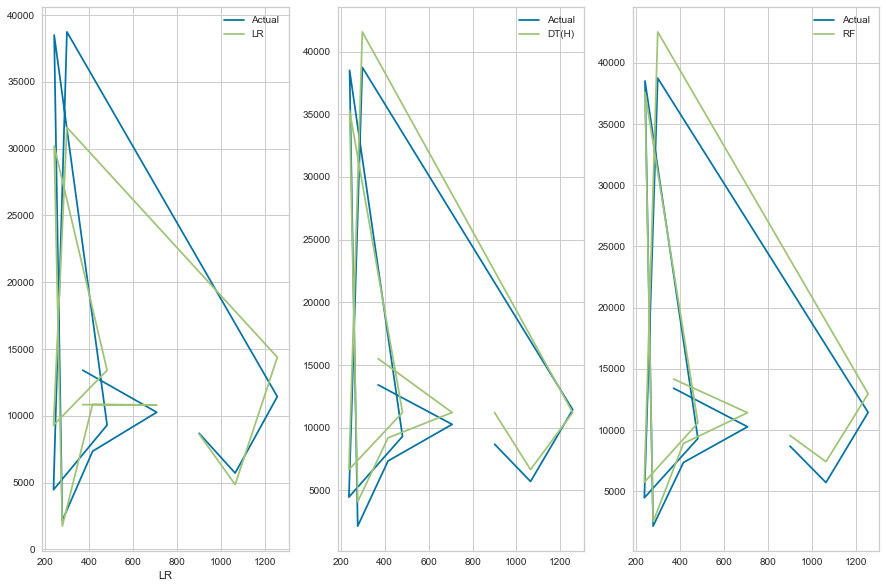

In [101]:
plt. figure(figsize=(15,10))
plt.subplot(131)
plt.plot(dff['Actual'].iloc[0:11],label='Actual')
plt.plot(dff['LR'].iloc[0:11],label='LR')
plt.xlabel('LR')
plt.legend()


plt.subplot(132)
plt.plot(dff['Actual'].iloc[0:11],label='Actual')
plt.plot(dff['DT(H)'].iloc[0:11],label='DT(H)')
plt.legend()

plt.subplot(133)
plt.plot(dff['Actual'].iloc[0:11],label='Actual')
plt.plot(dff['RF'].iloc[0:11],label='RF')

plt.legend()

In [102]:
dff1=pd.DataFrame({'Accuracy':[score0,score6,score71],
       'Accuracy2':[score1,score7,score8]}, index=['Linear Regression','Decision Tree (hyperparameter)','Random Forest'])

In [103]:
dff1

,Accuracy,Accuracy2
Linear Regression,73.25,77.29
Decision Tree (hyperparameter),86.07,86.68
Random Forest,97.60,86.10


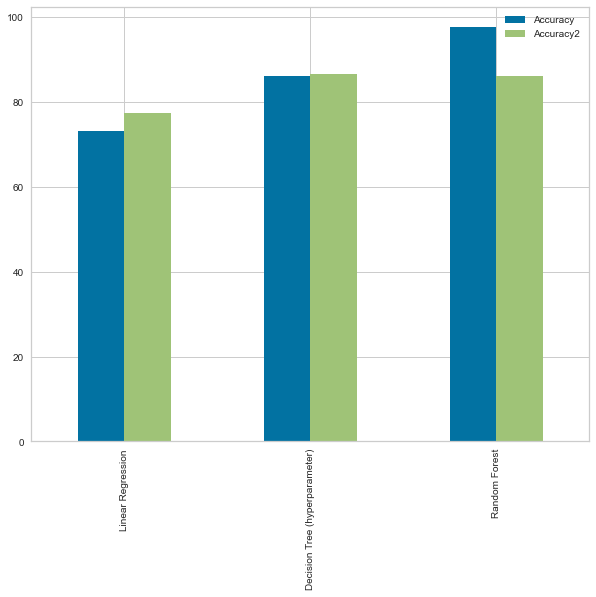

In [104]:
dff1.plot(kind="bar",figsize=(10, 8))
plt.show()

## CONCLUSION

### By comparing all the modelswith accuracy,r2_score score we find that Random Forest Algorithm is best model for predict charges

### Predict Charges for new customer

In [116]:
data=({'age':[40,50],'sex':[1,1],'bmi':[40.30,35],'children':[4,5],'smoker':[1,0],'region':[1,2],'weigh_status':[4,3]})

In [117]:
dfff=pd.DataFrame(data,index=[0,1])


In [118]:
dfff

,age,sex,bmi,children,smoker,region,weigh_status
0,40,1,40.3,4,1,1,4
1,50,1,35.0,5,0,2,3


In [121]:
new_pred=rf.predict(dfff)
new_pred

array([47803.7993285, 27121.5037385])

### Save Model Using Joblib

In [109]:
rf=RandomForestRegressor(oob_score=True)
rf.fit(x_train,y_train)

RandomForestRegressor(oob_score=True)

In [110]:
import joblib

In [111]:
joblib.dump(rf,'model_joblib_rf')#save the model


['model_joblib_rf']

In [112]:
model=joblib.load('model_joblib_rf')# Use the loaded pickled model to make predictions

In [113]:
model.predict(dfff)

array([47803.7993285])

## GUI

In [114]:
from tkinter import *
import joblib

In [115]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    model=joblib.load('model_joblib_rf')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7]])
    
    Label(master,text= 'Insurance Cost').grid(row=8)
    Label(master,text=result).grid(row=9)
    
    

master=Tk()
master.title('Insurance Cost prediction')
label=Label(master,text = 'Insurance Cost prediction',bg='black',fg='white').grid(row=0,columnspan=2)

Label(master,text='Enter your age').grid(row=1)
Label(master,text='Enter your sex').grid(row=2)
Label(master,text='Enter your bmi').grid(row=3)
Label(master,text='Enter Number Of  children').grid(row=4)
Label(master,text='Smoker Yes/No').grid(row=5)
Label(master,text='Region [1-4]').grid(row=6)
Label(master,text='Enter your weight_status').grid(row=7)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)

Button(master,text='predict',command=show_entry).grid()  #Creating 'Calculate Score' button


mainloop()